# Summer School Project
## Groupe

- Name : Data Alchemists

- Students: 
    * Baptiste Bucamp
    * Aymen Ezzayer
    * Thomas Leblond
    * Huu Phuc Le
    * Hugo Simony-Jungo

## Subjet

- Purpose : To assess your level of knowledge and comprehension on the topics covered in the entire program.

- Task : Predict University Students Enrollment Using Machine Learning Methods
    1. Apply DE techniques to collect suitable Data (from any university, any country, ... )
    2. Apply ML or DM methods on the collected data
        
## Dataset's choice

- Name : Parcoursup's application list

- Data Sources : 

|Year|Link|
|-|-|
|2022|https://www.data.gouv.fr/fr/datasets/parcoursup-2022-voeux-de-poursuite-detudes-et-de-reorientation-dans-lenseignement-superieur-et-reponses-des-etablissements/|
|2021|https://www.data.gouv.fr/fr/datasets/parcoursup-2021-voeux-de-poursuite-detudes-et-de-reorientation-dans-lenseignement-superieur-et-reponses-des-etablissements-3/|
|2020|https://www.data.gouv.fr/fr/datasets/parcoursup-2020-voeux-de-poursuite-detudes-et-de-reorientation-dans-lenseignement-superieur-et-reponses-des-etablissements/|
|2019|https://www.data.gouv.fr/fr/datasets/parcoursup-2019-voeux-de-poursuite-detudes-et-de-reorientation-dans-lenseignement-superieur-et-reponses-des-etablissements-2/|

- Description : list of all the application into university using Parcoursup in France for the year 2018-2022.

In [7]:
#import libraries to download data files
import requests
import os

In [9]:
#save links of the data into a list of tuple (url,year)
l_url = [
    # ("https://www.data.gouv.fr/fr/datasets/r/5a51c079-fa7b-4278-862d-b5871eb06d20",2018),
    ("https://www.data.gouv.fr/fr/datasets/r/11738164-f744-4fc7-a026-6e93f819fd76",2019),
    ("https://www.data.gouv.fr/fr/datasets/r/7400c7d1-8db6-43b2-9235-aae564223963",2020),
    ("https://www.data.gouv.fr/fr/datasets/r/52c41cd5-ce79-4052-8a07-bae0ecf0f36b",2021),
    ("https://www.data.gouv.fr/fr/datasets/r/1d916b7c-bd4c-4951-845a-70f7ad7c17db",2022)]


In [16]:
#download each file and save it into a csv file
for url,year in l_url:
    #get the data from the url
    response = requests.get(url)
    if response.status_code != 200:
        print("Error while dowloading file")
        continue
    #save the data into a csv file
    with open(f"data/{str(year)}.csv",'wb') as f:
        f.write(response.content)
    print(f"file {str(year)}.csv created")

file 2018.csv created
file 2019.csv created
file 2020.csv created
file 2021.csv created
file 2022.csv created


In [10]:
# %pip install --upgrade pandas-profiling

In [65]:
#import pandas to load the data from the csv files
import pandas as pd
pd.set_option('display.max_columns', None)
# from pandas_profiling import ProfileReport

In [56]:
l_df = []
#list of columns to keep
l_cols = ["session","cod_uai","g_ea_lib_vx","fil_lib_voe_acc","capa_fin","voe_tot","nb_voe_pp","nb_voe_pp_bp","nb_voe_pp_at",
"nb_cla_pp","nb_cla_pp_bg","prop_tot","acc_tot","acc_debutpp","acc_datebac","acc_finpp","acc_neobac","acc_bg","pct_acc_debutpp",
"pct_acc_datebac","pct_acc_finpp"]

#iter over each csv file inside the data folder
for file in os.listdir("data"):
    match file.split(".")[0]:
        case "2022":
            df = pd.read_csv(f"data/{file}",sep=";")
            df = df[l_cols]
            l_df.append(df)
        case "2021" | "2020":
            df = pd.read_csv(f"data/{file}",sep=";")
            df = df[l_cols]
            df = df.rename({"taux_adm_psup":"taux_acces_ens"},axis=1)
            l_df.append(df)
        case "2019":
            df = pd.read_csv(f"data/{file}",sep=";")
            df = df[l_cols]
            l_df.append(df)
        case _:
            # 2018 csv file got too much different columns name, we don't use it
            pass 
  
df = pd.concat(l_df,ignore_index=True)

In [28]:
df.describe()


,session,capa_fin,voe_tot,nb_voe_pp,nb_voe_pp_bp,nb_voe_pp_at,nb_cla_pp,nb_cla_pp_bg,prop_tot,acc_tot,acc_debutpp,acc_datebac,acc_finpp,acc_neobac,acc_bg,pct_acc_debutpp,pct_acc_datebac,pct_acc_finpp
count,51377.000000,51357.000000,51377.000000,51377.000000,51377.000000,51377.000000,51377.000000,51377.000000,51377.000000,51377.000000,51377.000000,51377.000000,51377.000000,51377.000000,51377.000000,51153.000000,51153.000000,51153.000000
mean,2020.566538,58.490079,844.160636,814.294607,62.116239,232.915818,588.995445,315.445277,267.700274,50.368433,14.427837,39.248886,44.930319,37.551589,25.391829,28.276373,76.843393,88.408627
std,1.107880,109.076615,1310.068918,1310.123153,112.357603,501.723757,1073.507779,720.218940,422.119827,88.615677,36.905473,73.815538,81.028935,70.638445,64.822949,23.723348,20.067195,14.310122
min,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,20.000000,184.000000,162.000000,3.000000,37.000000,102.000000,17.000000,66.000000,15.000000,2.000000,12.000000,14.000000,11.000000,2.000000,10.000000,67.690000,83.870000
50%,2021.000000,32.000000,396.000000,362.000000,23.000000,94.000000,231.000000,65.000000,124.000000,27.000000,5.000000,21.000000,24.000000,20.000000,6.000000,22.220000,80.950000,91.960000
75%,2022.000000,53.000000,903.000000,857.000000,69.000000,221.000000,554.000000,304.000000,272.000000,47.000000,12.000000,36.000000,42.000000,35.000000,24.000000,40.000000,91.176471,99.530000
max,2022.000000,3400.000000,18190.000000,18190.000000,1702.000000,8137.000000,16823.000000,12951.000000,8795.000000,2680.000000,1548.000000,2435.000000,2590.000000,2311.000000,2160.000000,100.000000,100.000000,100.000000


In [57]:
#Filter on Epita Data
df_epita = df[df["g_ea_lib_vx"].str.contains("EPITA")]
df_epita

,session,cod_uai,g_ea_lib_vx,fil_lib_voe_acc,capa_fin,voe_tot,nb_voe_pp,nb_voe_pp_bp,nb_voe_pp_at,nb_cla_pp,nb_cla_pp_bg,prop_tot,acc_tot,acc_debutpp,acc_datebac,acc_finpp,acc_neobac,acc_bg,pct_acc_debutpp,pct_acc_datebac,pct_acc_finpp
673,2021,T942095T,EPITA Toulouse,Formation d'ingénieur Bac + 5,70.0,2168,2168,0,6,1788,1788,1290,81,55.0,67.0,77.0,81,81,67.900000,82.720000,95.060000
3344,2021,0942095S,EPITA Paris,Formation Bac + 3,30.0,171,161,0,1,100,83,76,34,16.0,29.0,31.0,34,29,47.060000,85.290000,91.180000
3397,2021,T942095L,EPITA Lyon,Formation d'ingénieur Bac + 5,85.0,2338,2338,0,6,1950,1950,1261,101,68.0,87.0,95.0,101,101,67.330000,86.140000,94.060000
5429,2021,0942095S,EPITA Paris,Formation d'ingénieur Bac + 5,15.0,95,91,0,0,27,0,28,9,8.0,8.0,9.0,9,0,88.890000,88.890000,100.000000
5444,2021,T942095S,EPITA Strasbourg,Formation d'ingénieur Bac + 5,60.0,1805,1801,0,4,1497,1497,1219,65,42.0,52.0,63.0,65,65,64.620000,80.000000,96.920000
8783,2021,0942095S,EPITA Paris,Formation d'ingénieur Bac + 5,220.0,3197,3197,0,8,2601,2600,1684,262,209.0,244.0,254.0,262,262,79.770000,93.130000,96.950000
8803,2021,T942095R,EPITA Rennes,Formation d'ingénieur Bac + 5,70.0,1902,1902,0,5,1590,1590,1178,76,61.0,65.0,76.0,76,76,80.260000,85.530000,100.000000
12926,2021,0942095S,EPITA Paris,Formation d'ingénieur Bac + 5,50.0,1572,1572,0,5,874,873,541,66,47.0,56.0,66.0,66,66,71.210000,84.850000,100.000000
15319,2022,T942095L,EPITA Lyon,Formation d'ingénieur Bac + 5,85.0,2088,2088,0,12,1749,1749,1431,123,123.0,123.0,123.0,123,123,100.000000,100.000000,100.000000
15320,2022,T942095T,EPITA Toulouse,Formation d'ingénieur Bac + 5,75.0,1875,1875,0,11,1578,1578,1297,89,80.0,82.0,86.0,89,89,90.000000,92.000000,97.000000


In [58]:
#delete records when there is missing values (~241 records)
df = df.dropna().reset_index(drop=True)
df

,session,cod_uai,g_ea_lib_vx,fil_lib_voe_acc,capa_fin,voe_tot,nb_voe_pp,nb_voe_pp_bp,nb_voe_pp_at,nb_cla_pp,nb_cla_pp_bg,prop_tot,acc_tot,acc_debutpp,acc_datebac,acc_finpp,acc_neobac,acc_bg,pct_acc_debutpp,pct_acc_datebac,pct_acc_finpp
0,2021,0070029U,Lycée Gabriel Faure,Service et prestation des secteurs sanitaire e...,30.0,428,423,144,129,278,25,142,25,2.0,15.0,19.0,21,2,8.00,60.00,76.000000
1,2021,0751719L,Université Sorbonne Nouvelle Paris 3,"Langues, littératures & civilisations étrangèr...",6.0,67,67,6,38,60,19,30,5,0.0,5.0,5.0,1,1,0.00,100.00,100.000000
2,2021,0751719L,Université Sorbonne Nouvelle Paris 3,"Langues, littératures & civilisations étrangèr...",30.0,144,94,6,26,93,56,131,29,3.0,14.0,24.0,14,10,10.34,48.28,82.760000
3,2021,0751719L,Université Sorbonne Nouvelle Paris 3,"Langues, littératures & civilisations étrangèr...",25.0,174,174,2,47,174,117,87,25,7.0,21.0,22.0,22,21,28.00,84.00,88.000000
4,2021,0751719L,Université Sorbonne Nouvelle Paris 3,"Langues, littératures & civilisations étrangèr...",20.0,83,48,0,19,48,23,74,19,6.0,11.0,16.0,11,6,31.58,57.89,84.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51131,2019,0930129K,Lycée professionnel Madeleine Vionnet,FCIL classe passerelle BTS,30.0,0,0,0,0,0,0,94,27,0.0,0.0,8.0,26,0,0.00,0.00,29.629630
51132,2019,0020049T,Lycée Pierre de La Ramee,FCIL classe passerelle BTS,20.0,0,0,0,0,0,0,18,5,0.0,0.0,0.0,5,0,0.00,0.00,0.000000
51133,2019,0600020W,Lycée Marie Curie,FCIL classe passerelle BTS,20.0,0,0,0,0,0,0,24,5,0.0,0.0,0.0,3,0,0.00,0.00,0.000000
51134,2019,0891200W,Lycée Catherine et Raymond JANOT,FCIL classe passerelle BTS,48.0,0,0,0,0,0,0,193,15,0.0,0.0,2.0,14,0,0.00,0.00,13.333333


# Columns that are different or missing compared to the 2022 csv file
2021:"['taux_acces_ens', 'part_acces_gen'] not in index"
2020:"['taux_acces_ens', 'part_acces_gen'] not in index"
2019:"['prop_tot_bg', 'ran_grp1', 'taux_acces_ens', 'part_acces_gen']"
2018:"['acc_debutpp', 'acc_datebac', 'acc_finpp', 'pct_acc_debutpp', 'pct_acc_datebac', 'pct_acc_finpp', 'prop_tot_bg', 'ran_grp1', 'taux_acces_ens', 'part_acces_gen']""

# 
de côté : 
"ran_grp1","ran_grp2" ... : contient des nans et change de nom pour les années 2019 et 2018
'prop_tot_bg' : absent en 2019
'taux_acces_ens'
'part_acces_gen'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13396 entries, 0 to 13395
Columns: 118 entries, Session to composante_id_paysage
dtypes: float64(45), int64(48), object(25)
memory usage: 12.1+ MB


In [ ]:
# ProfileReport(df_2022)

 # select columns and their meanings (french original)
 "session": année de la session
 "cod_uai":Identifiant de l’établissement
 "g_ea_lib_vx": libellé de l'établissement
 "fil_lib_voe_acc":Filière de formation
 "capa_fin":Capacité de l’établissement par formation
 "voe_tot": Effectif total des candidats pour une formation
 "nb_voe_pp": Effectif total des candidats en phase principale
 "nb_voe_pp_bp": Effectif des candidats en terminale générale en phase principale
 "nb_voe_pp_at" : Effectif des autres candidats en phase principale
 "nb_cla_pp" :"Effectif total des candidats classés par l’établissem ent en phase principale"
 "nb_cla_pp_bg":Effectif des candidats en terminale générale classés par l’établissement
 "nb_voe_pp_at":Effectif des autres candidats en phase principale 
 "nb_cla_pp":Effectif total des candidats classés par l’établissement en phase principale 
 "nb_cla_pp_bg":Effectif des candidats en terminale générale classés par l’établissement en phase principale
 "prop_tot": Effectif total des candidats ayant reçu une proposition d’admission de la part de l’établissement
 "acc_tot": Effectif total des candidats ayant accepté la proposition de l’établissement (admis) 
 "acc_debutpp": Dont effectif des admis ayant reçu leur proposition d’admission le 27 mai (ouverture PP) 
 "acc_datebac" :Dont effectif des admis ayant reçu leur proposition d’admission avant le baccalauréat (17 juin) 
 "acc_finpp": Dont effectif des admis ayant reçu leur proposition d’admission avant la fin de la procédure principale (16 juillet) 
 "acc_neobac": Effectif des admis néo bacheliers
 "acc_bg":Effectif des admis néo bacheliers généraux
 "pct_acc_debutpp":% d’admis ayant reçu leur proposition d’admission le 27 mai (ouverture PP)
 "pct_acc_datebac": % d’admis ayant reçu leur proposition d’admission avant le baccalauréat (17 juin)
 "pct_acc_finpp": % d’admis ayant reçu leur proposition d’admission avant la fin de la procédure principale (16 juillet)
 "prop_tot_bg" : Effectif des candidats en terminale générale ayant reçu une proposition d’admission de la part de l’établissement
 "ran_grp1" :  Rang du dernier appelé du groupe 1
 "taux_acces_ens" : Taux d’accès (= rapport entre le nombre de candidats dont le rang de classement est inférieur ou égal au rang du dernier appelé de son groupe et le nombre de candidats ayant validé un vœu pour la formation étudiée en phase principale)
 "part_acces_gen": Part des terminales générales qui étaient en position de recevoir une proposition en phase principale en 2022

We are going to predict the field acc_tot : Total number of candidates who accepted the school's proposal (admitted)

final selected fields for predictions (11): 
- capa_fin : Plant capacity by course
- voe_tot : Total number of applicants for a training course
- nb_voe_pp : Total number of candidates in the main selection phase
- nb_cla_pp : Total number of applicants ranked by the establishment in the main phase
- prop_tot : Total number of applicants who received an admission offer from the establishment
- acc_debutpp : Of which, those who received their admission offer on May 27 (PP opening)
- acc_datebac : Of which, those who received their admission offer before the baccalauréat (June 17)
- acc_finpp : Of which number of admitted who received their proposal admission n before the end of the procedure procedure
- pct_acc_debutpp : % of admissions received on May 27 (PP opening)
- pct_acc_datebac : % of those admitted who received their admission offer before the baccalauréat (June 17)
- pct_acc_finpp : % of applicants who received their admission offer before the end of the main procedure (July 16)

In [70]:
#import sklearn models for spliting data,modeling, training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
selected_features = ['capa_fin', 'voe_tot', 'nb_voe_pp', 'nb_cla_pp', 'prop_tot', 'acc_debutpp', 'acc_finpp', 'pct_acc_debutpp', 'pct_acc_datebac', 'pct_acc_finpp']
target_variable = 'acc_tot'

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df[target_variable], test_size=0.2, random_state=42)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [37]:
#testing the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

mse:38.20164948700588
rmse:6.180748295069609
r2:0.9948302350094842


In [71]:
#test on epita
# print(df_epita)
# print(df_epita["acc_tot"].head())
# df_epita_pred = df_epita[selected_features]
# print(model.predict(df_epita_pred))

In [72]:
# ploting time
import matplotlib.pyplot as plt

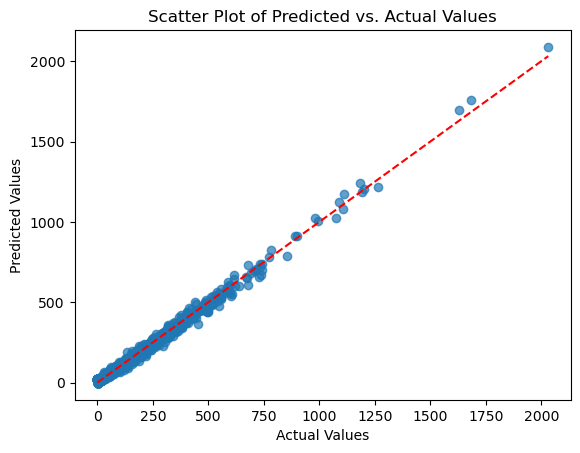

In [77]:
# Scatter Plot of Predicted vs. Actual Values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line that represents where a perfect model would be
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()

This plot allows to visualize how well the model predictions align with the actual target values.

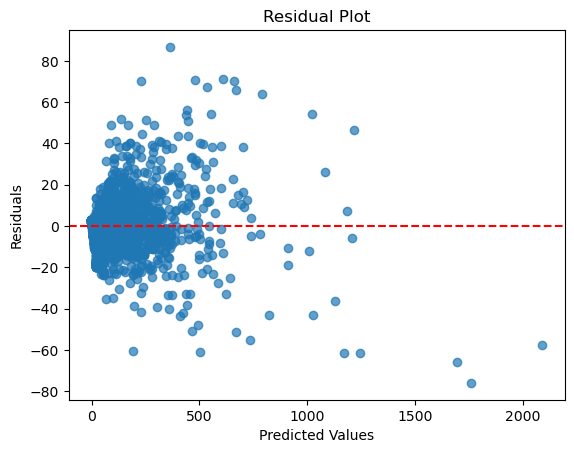

In [74]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

This plot shows the residuals (differences between actual and predicted values) against the predicted values. It helps to check for patterns or trends in the residuals.

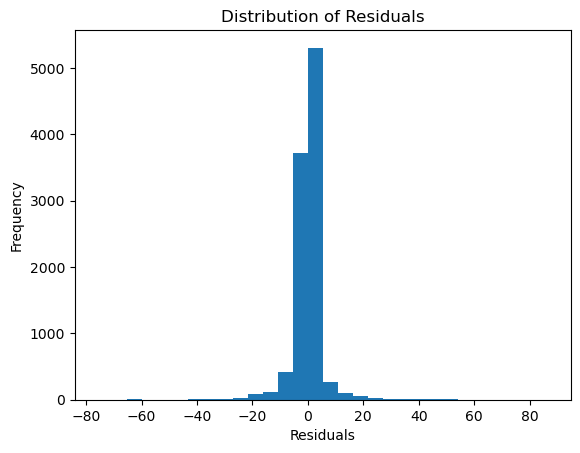

In [78]:
# distribution of residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

This histogram displays the distribution of residuals. Normally distributed residuals are desirable for regression models.

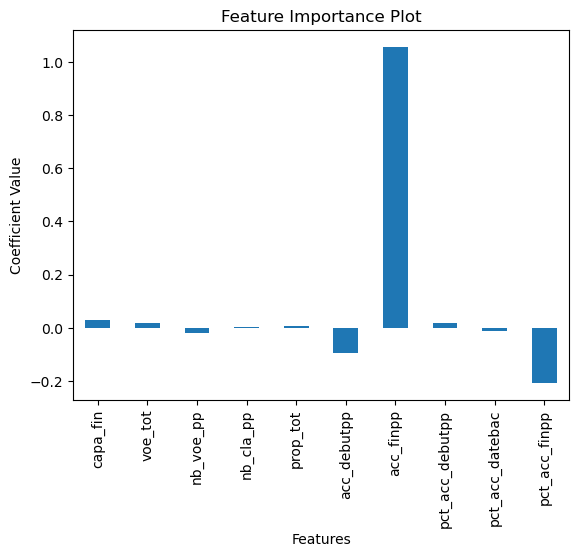

In [75]:
# Feature Importance Plot (coefficients)
coef_importance = pd.Series(model.coef_, index=selected_features)
coef_importance.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance Plot")
plt.show()

We plot the coefficients (importance) of the selected features. This gives an idea of which features have a larger impact on the model's predictions.